In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
import seaborn as sns
import sweetviz
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from statistics import correlation # to calculate the correlation between input and output data.

In [3]:
crime_train_df = pd.read_csv("criminal_train.csv")
crime_train_df = crime_train_df.drop(['PERID'], axis=1)

In [4]:
crime_train_df.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,4,2,4,1,3,1,1,1,99,99,...,1,2,1,1,2,2,3884.81,40026,1,0
1,4,1,3,1,2,1,1,1,99,99,...,2,2,2,3,2,2,1627.11,40015,2,1
2,4,1,2,1,2,1,1,1,99,99,...,2,2,2,3,2,2,4344.96,40024,1,0
3,4,0,2,1,1,1,1,1,99,99,...,2,2,1,1,2,2,792.52,40027,1,0
4,1,0,6,1,4,1,1,1,99,1,...,2,2,2,2,2,2,1518.12,40001,2,0


In [49]:
list(crime_train_df[crime_train_df.columns[0:]].corr()['Criminal'][:-1]) # get correlation of each columns to Criminal column. with df.corr() .

[-0.04993538456916074,
 -0.09121240331854426,
 -0.06828057407169288,
 0.00923829343805145,
 -0.03916824677936308,
 0.005859956087756996,
 0.11258871913730951,
 0.004111964558134786,
 0.004965858957386262,
 -0.038796719865628826,
 0.031178179451992222,
 0.05267102433342436,
 0.04084442865992084,
 0.0899604455659952,
 -0.19418791049389664,
 0.10696720087500348,
 -0.06971577226549049,
 0.017954164734665094,
 0.09133781143560164,
 0.08100640064462984,
 0.038379873399190724,
 0.03837884805529926,
 0.038381736341434526,
 0.03837816982742828,
 0.038378904382834936,
 0.08170421466895918,
 0.04822212792728594,
 -0.14413070289167756,
 0.037516037700063364,
 0.014456446752589999,
 0.0405290365376077,
 -0.2047967490794616,
 0.10335991172530008,
 0.10419592296569238,
 0.09503230795639445,
 -0.03444981911586165,
 -0.03444981911586165,
 0.04669843439974066,
 -0.08895942465125976,
 0.04987115899811457,
 -0.07562868627180472,
 0.007856829071624853,
 0.01793533227475371,
 -0.11067631287621905,
 0.026831

In [5]:
crime_train_df.describe()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,...,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00,45718.00
mean,3.36,0.48,3.43,1.00,2.08,1.01,1.16,1.01,97.39,70.87,...,2.22,2.23,1.65,1.76,1.98,1.98,4692.66,40023.74,1.49,0.07
std,1.18,0.89,1.43,0.06,1.10,0.12,0.47,0.15,12.36,44.33,...,5.30,5.29,0.62,0.77,0.14,0.15,5724.66,265.14,0.50,0.25
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00
25%,4.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,99.00,1.00,...,2.00,2.00,1.00,1.00,2.00,2.00,1252.40,40013.00,1.00,0.00
50%,4.00,0.00,3.00,1.00,2.00,1.00,1.00,1.00,99.00,99.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2719.34,40025.00,1.00,0.00
75%,4.00,1.00,4.00,1.00,3.00,1.00,1.00,1.00,99.00,99.00,...,2.00,2.00,2.00,2.00,2.00,2.00,5765.81,40039.00,2.00,0.00
max,4.00,3.00,6.00,3.00,4.00,3.00,3.00,3.00,99.00,99.00,...,98.00,98.00,3.00,3.00,2.00,2.00,109100.62,40050.00,2.00,1.00


In [41]:
correlation(crime_train_df['CELLWRKNG'], crime_train_df['Criminal']) # to get correlation between input and output data.
# output meanings : 
#     1 or between 0 and 1    =>   positive relation.
#     -1 or between 0 and -1     =>    negative relation.
#     0    =>    no relation.

0.017935332274753978

In [6]:
crime_train_df.isnull().sum()

IFATHER     0
NRCH17_2    0
IRHHSIZ2    0
IIHHSIZ2    0
IRKI17_2    0
           ..
AIIND102    0
ANALWT_C    0
VESTR       0
VEREP       0
Criminal    0
Length: 71, dtype: int64

                                             |          | [  0%]   00:00 -> (? left)


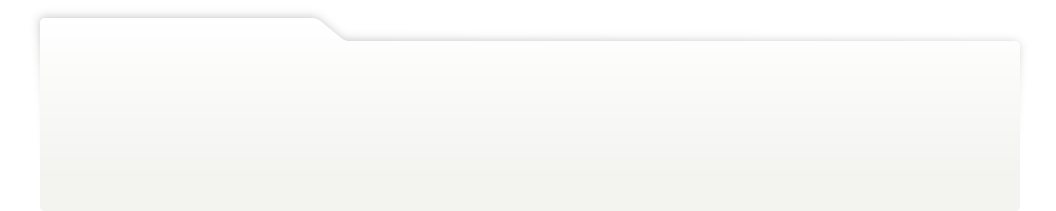
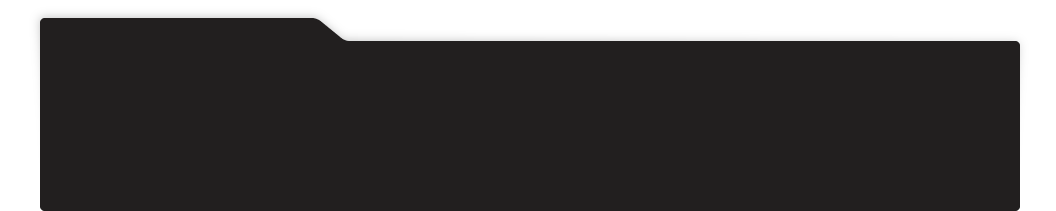
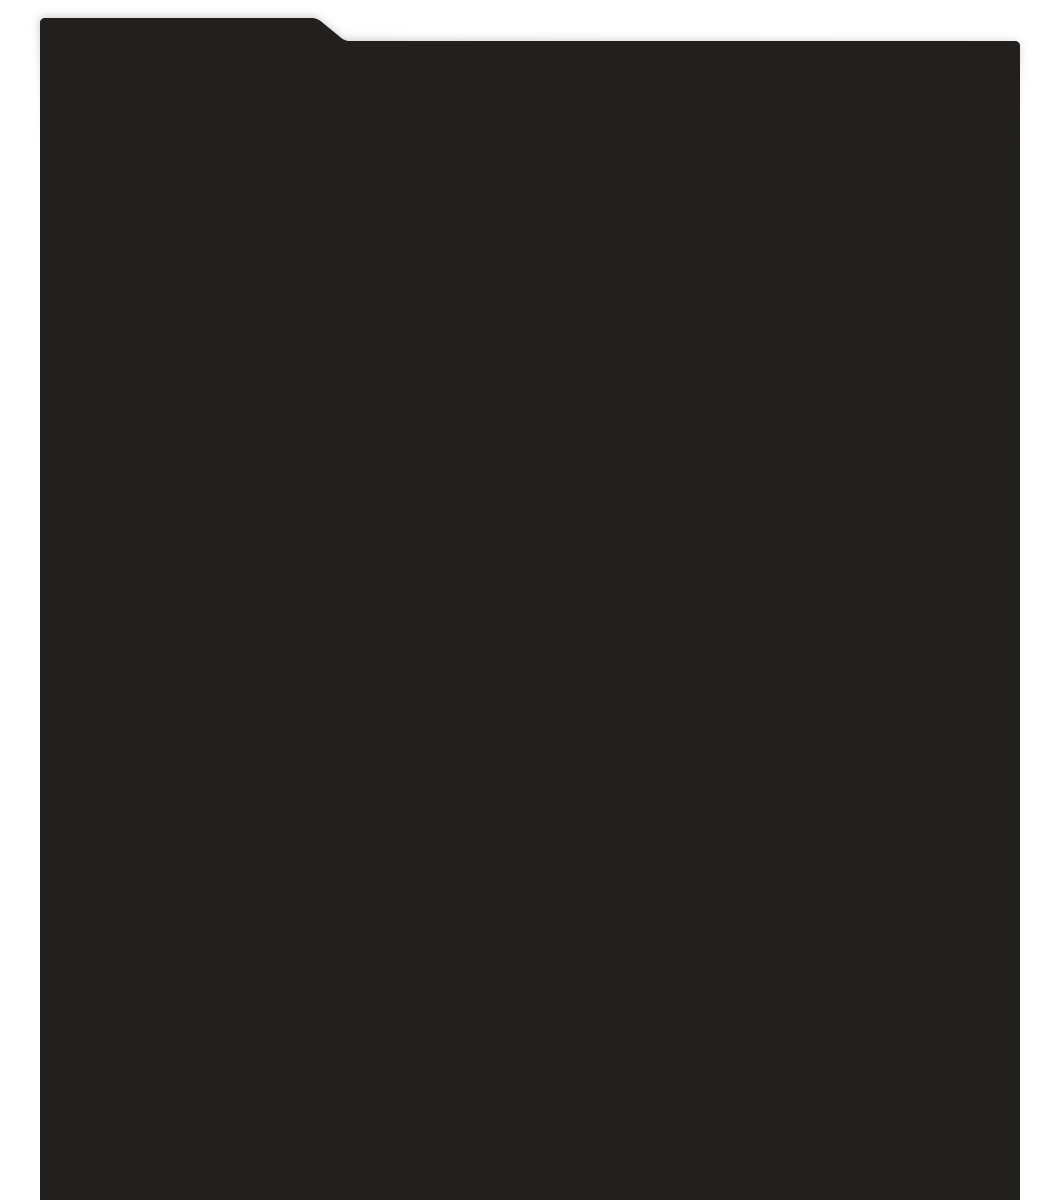
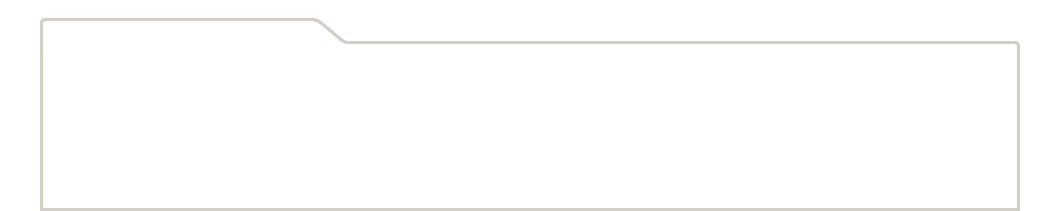
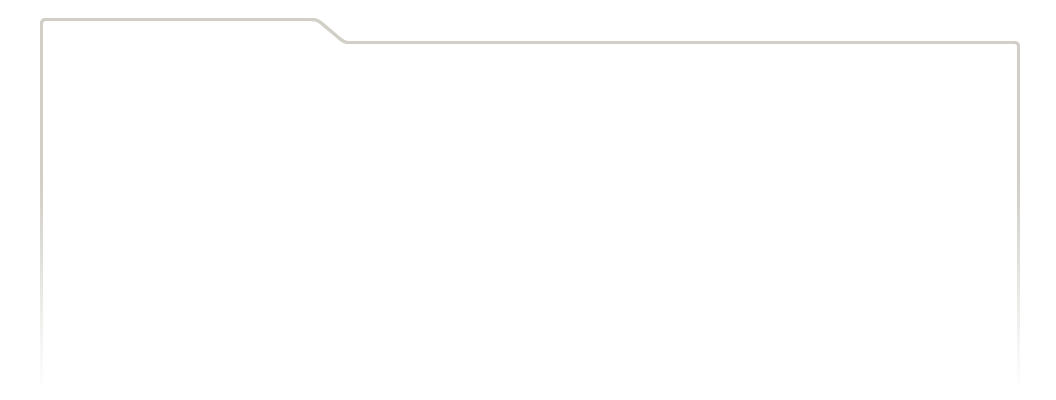
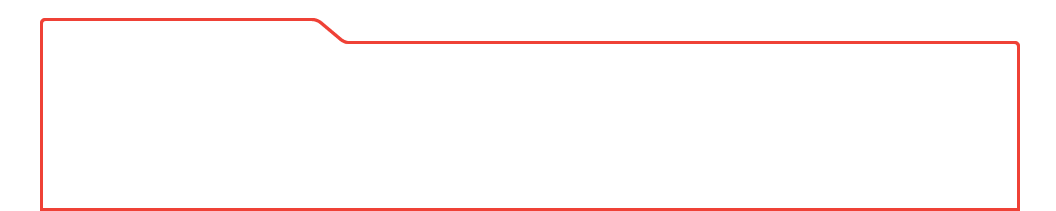
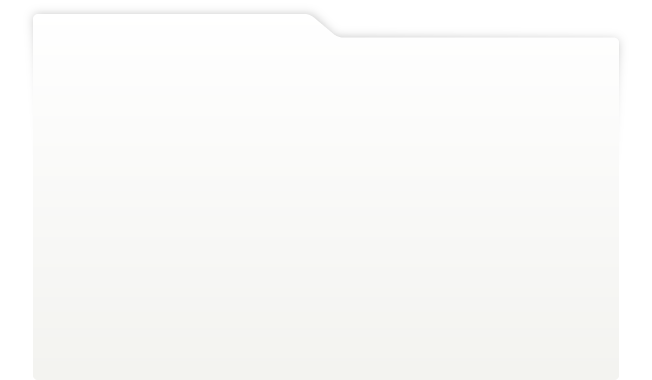
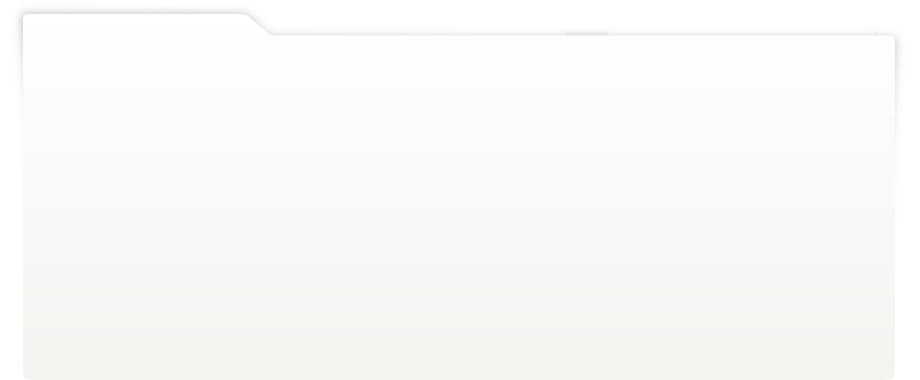
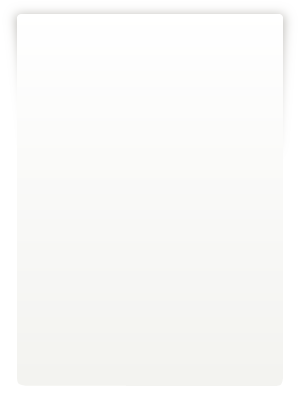
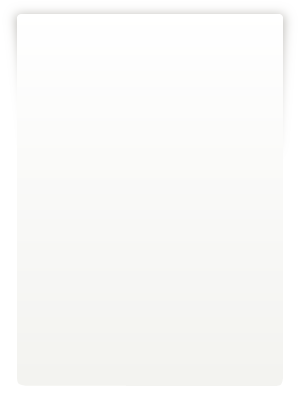
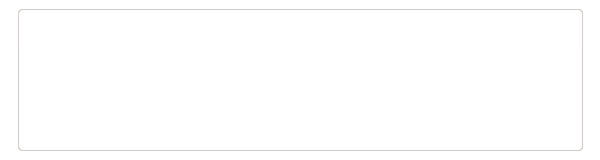
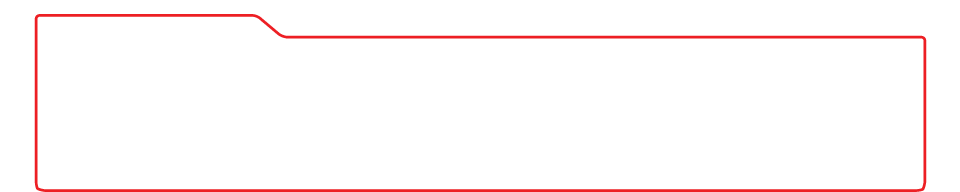
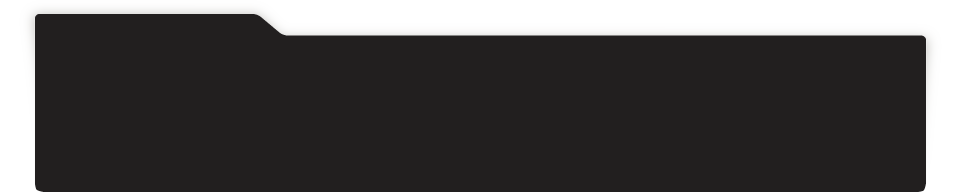
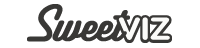
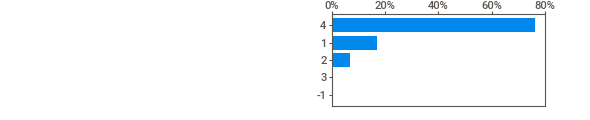
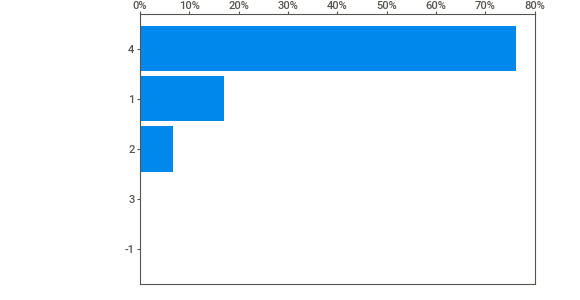
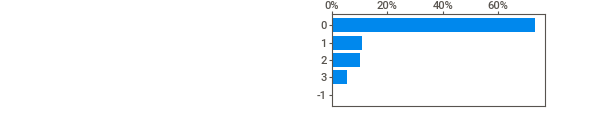
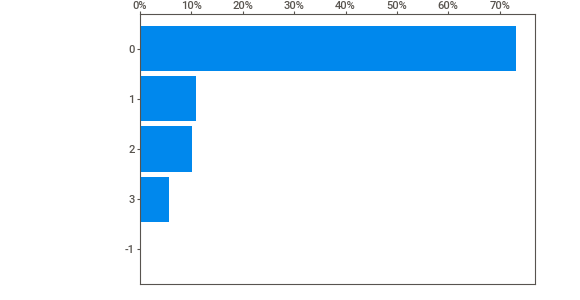
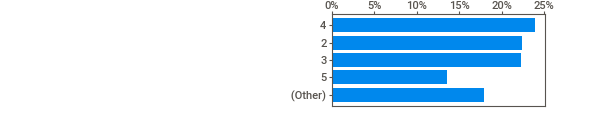
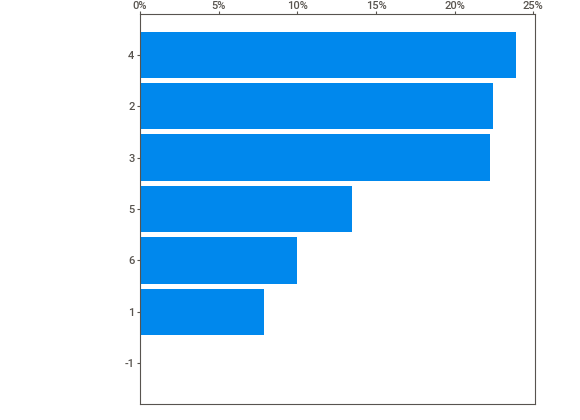
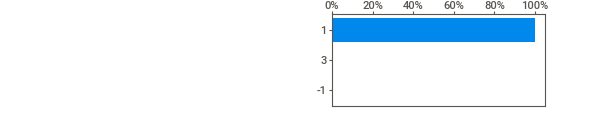
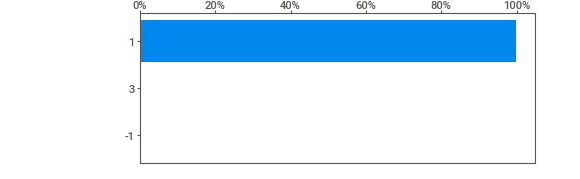
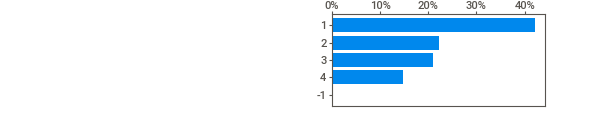
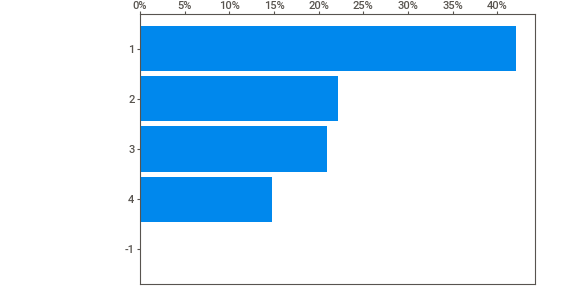
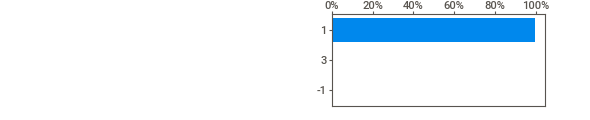
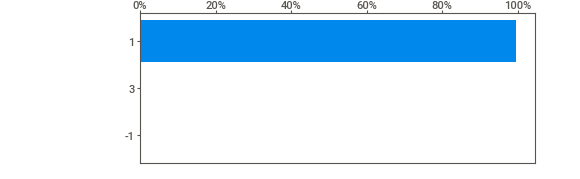
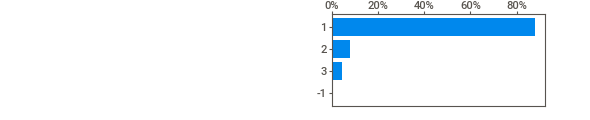
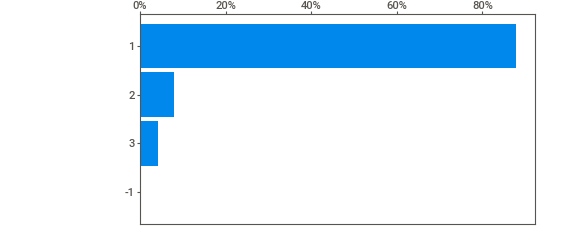
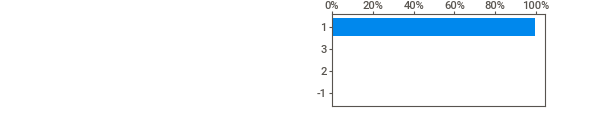
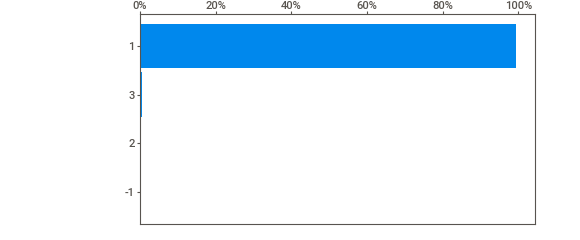
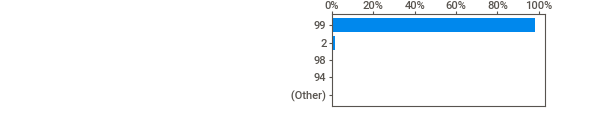
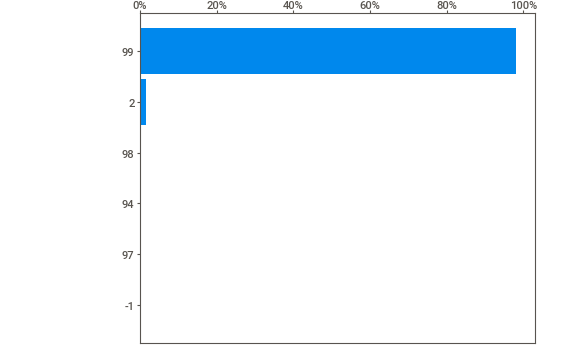
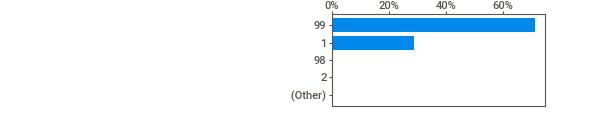
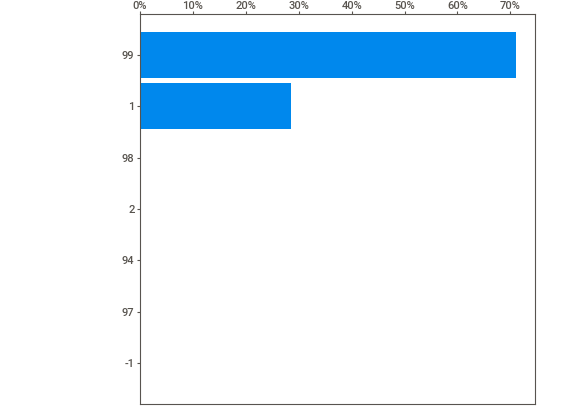
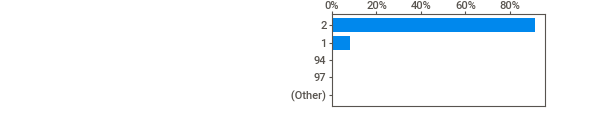
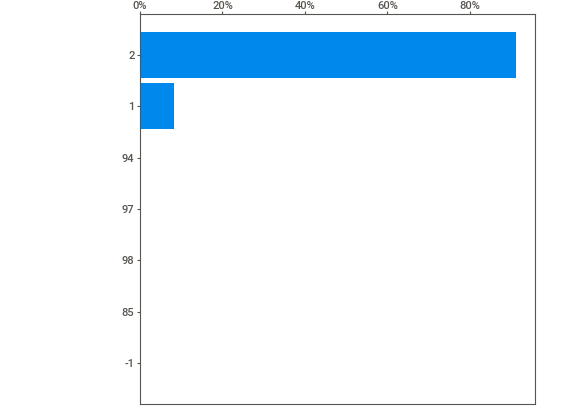
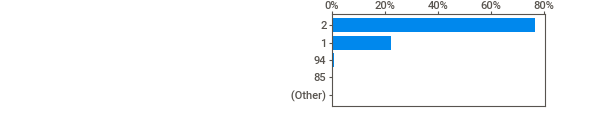
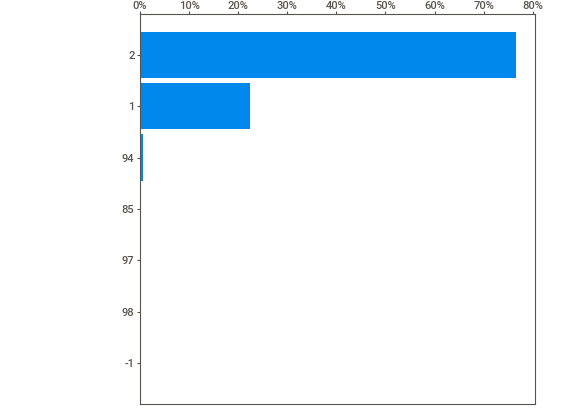
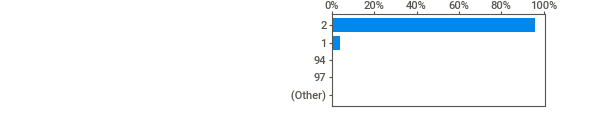
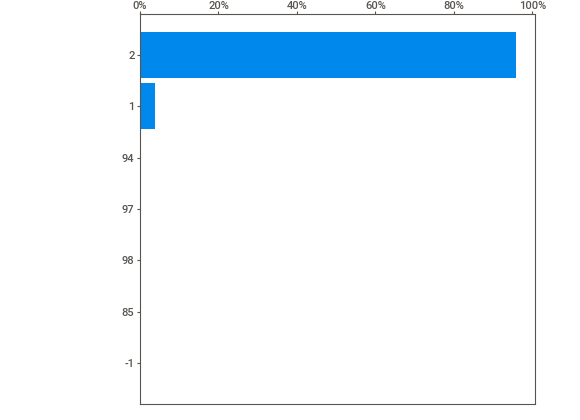
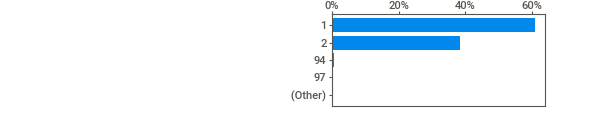
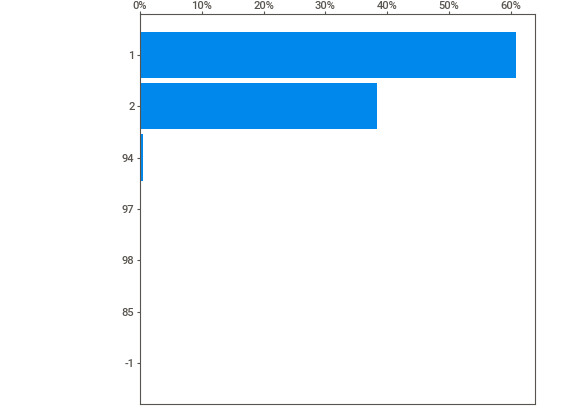
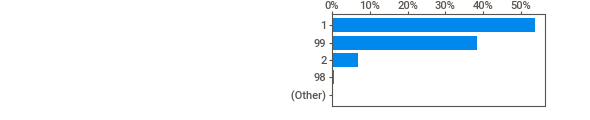
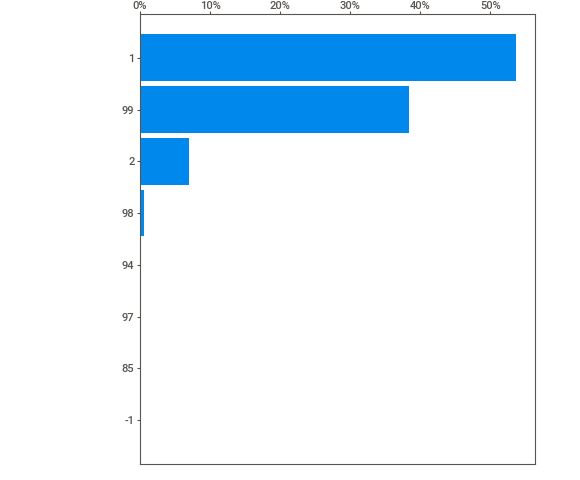
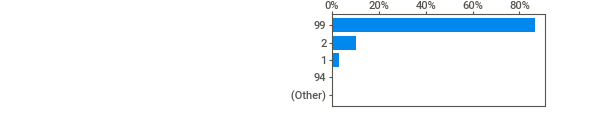
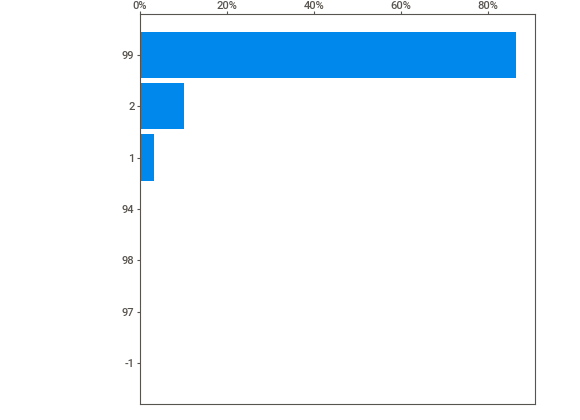
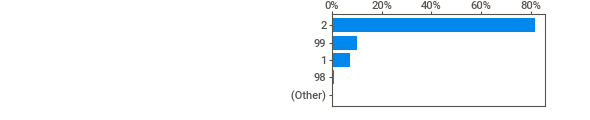
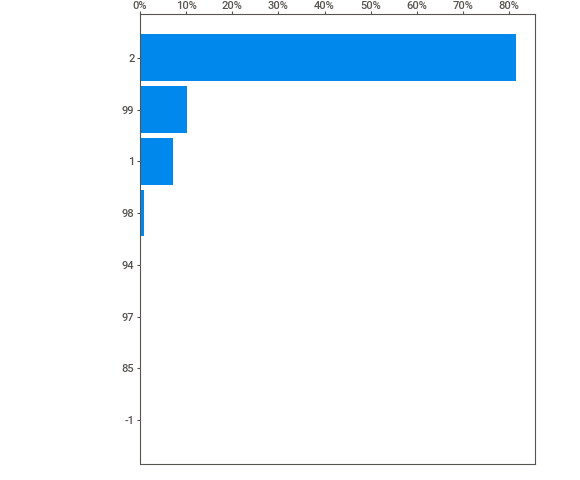
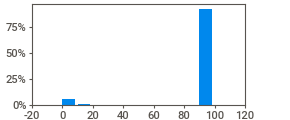
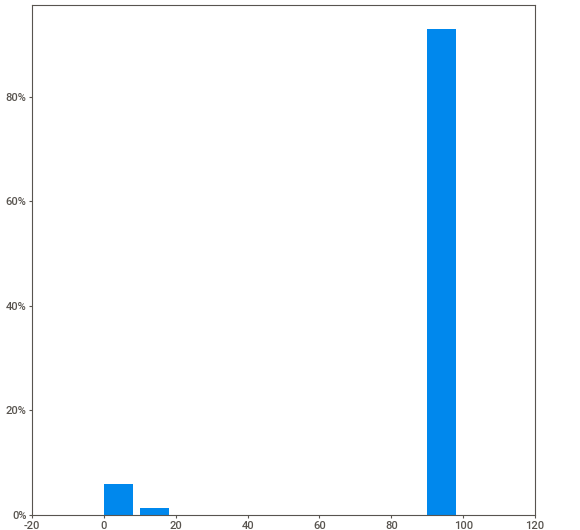
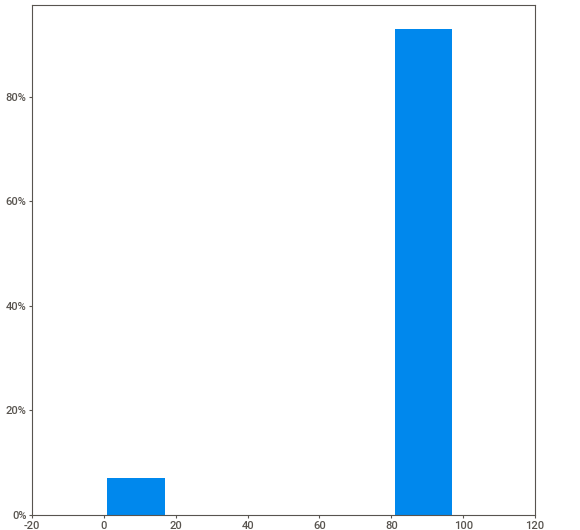
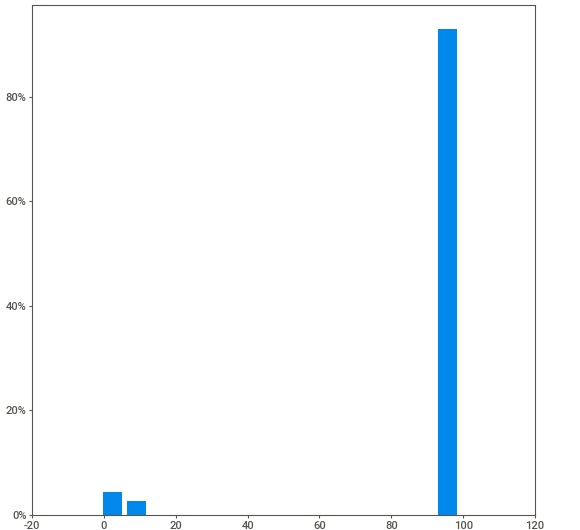
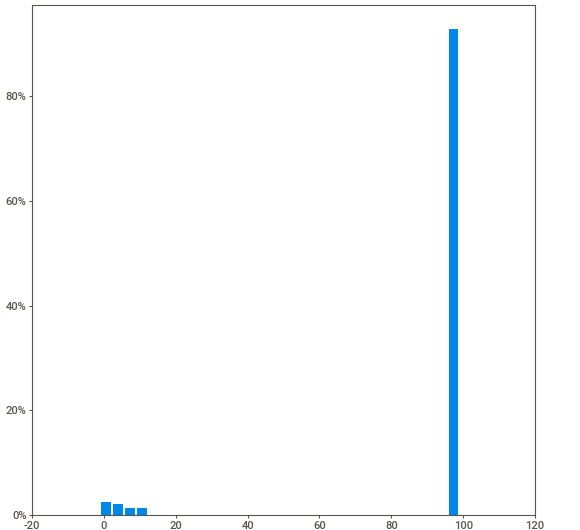
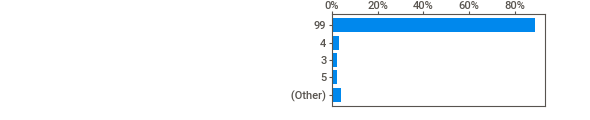
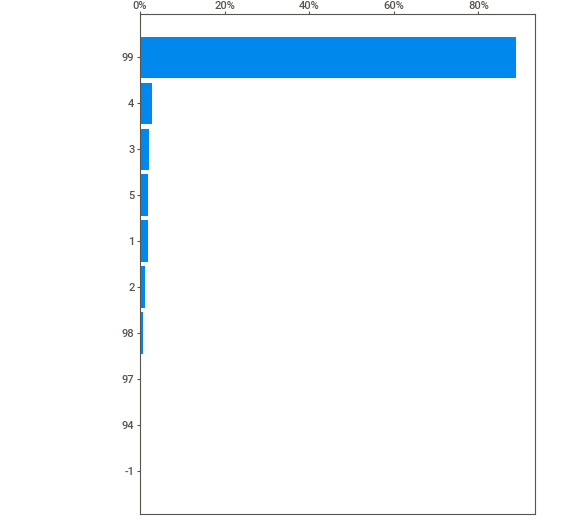
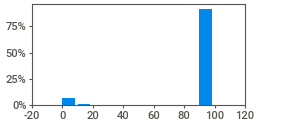
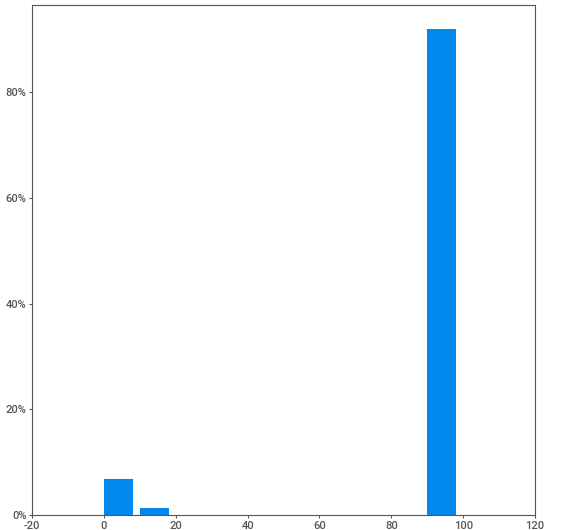
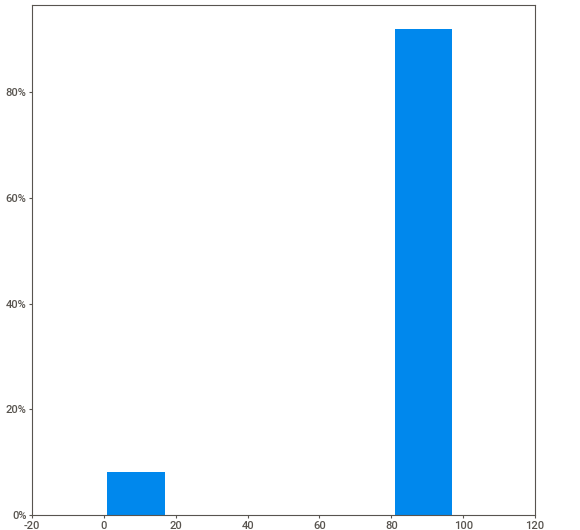
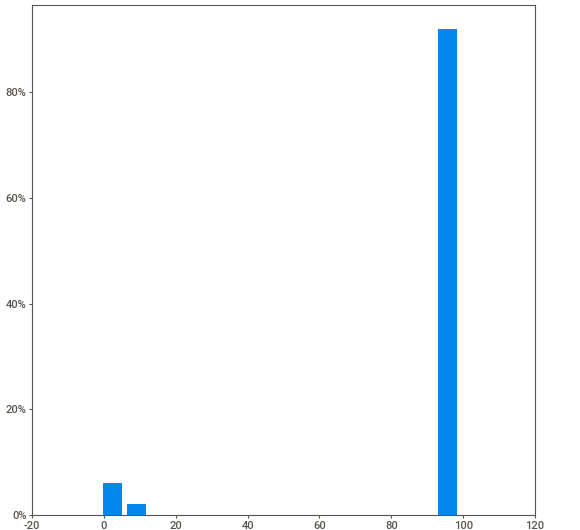
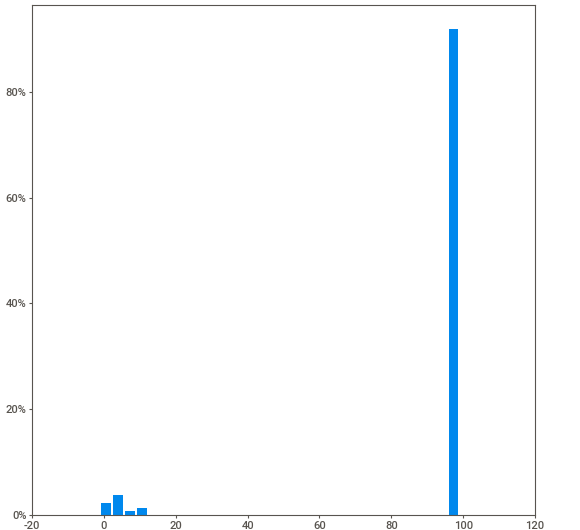
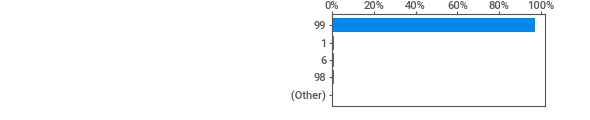
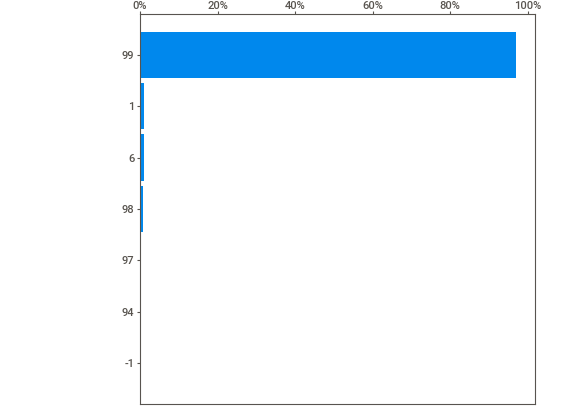
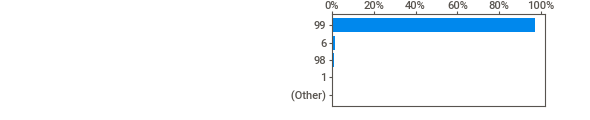
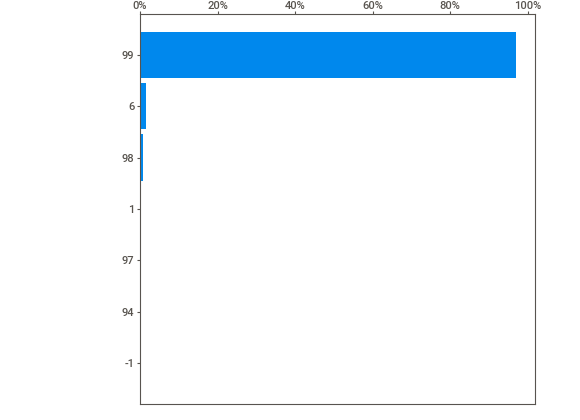
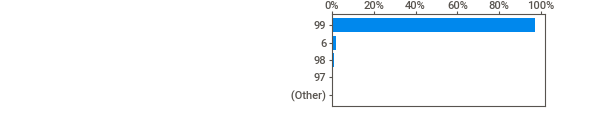
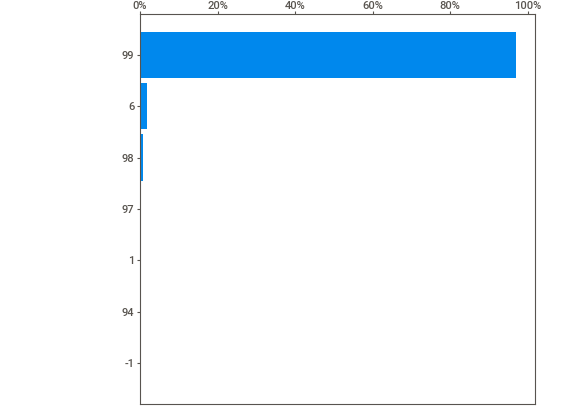
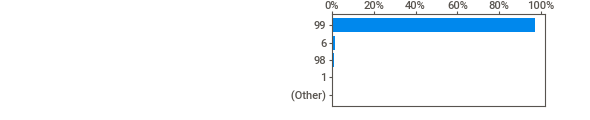
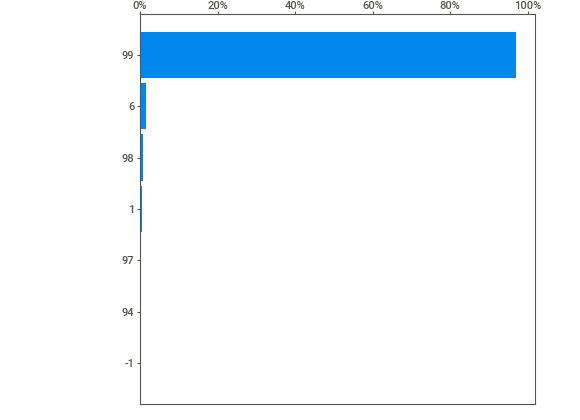
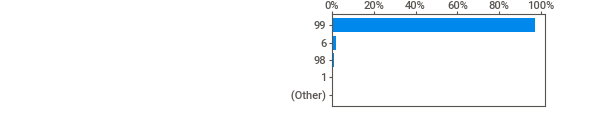
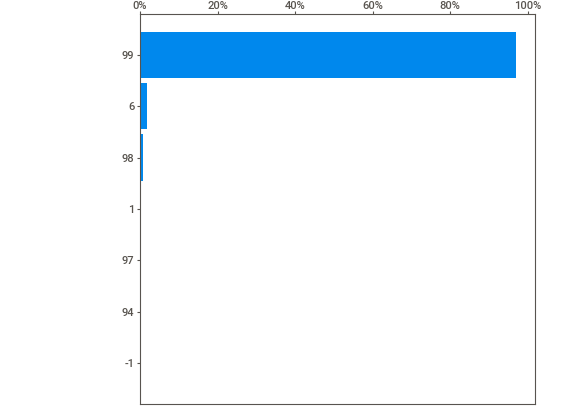
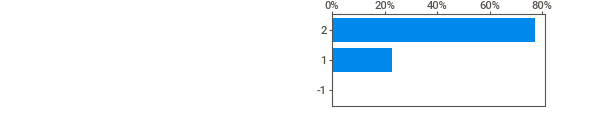
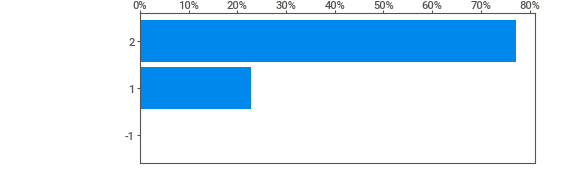
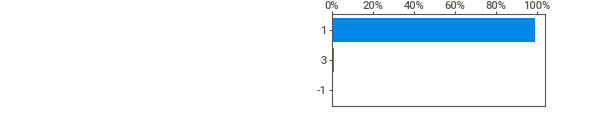
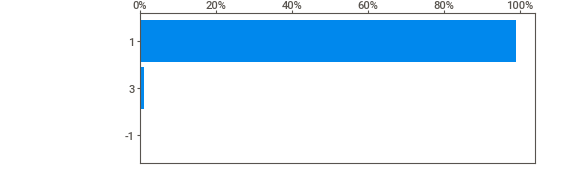
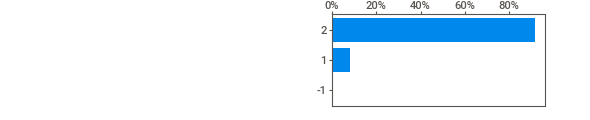
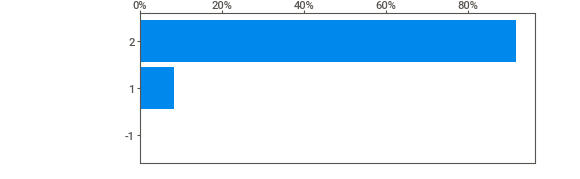
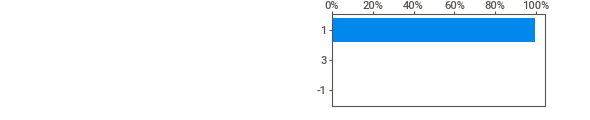
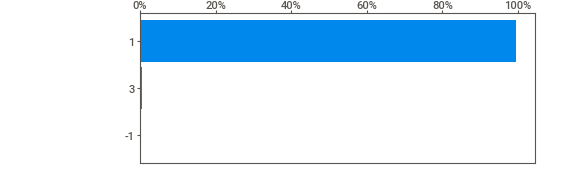
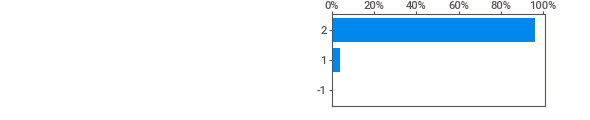
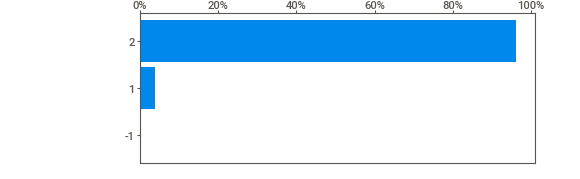
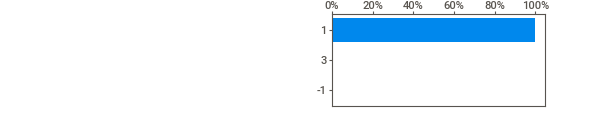
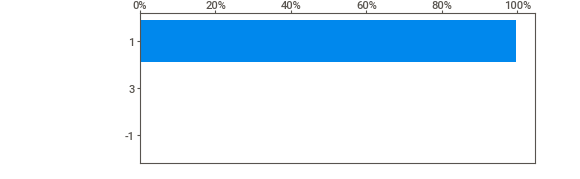
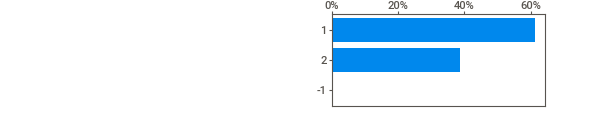
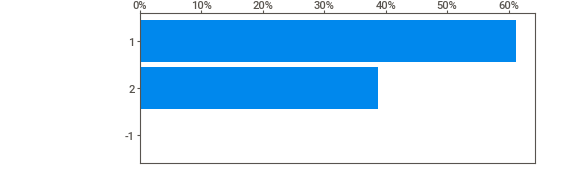
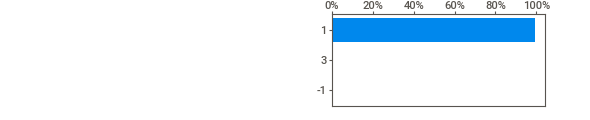
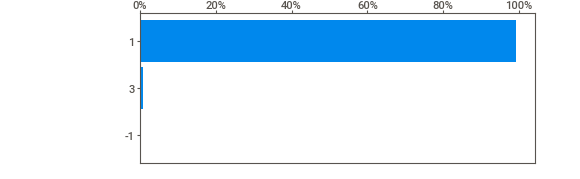
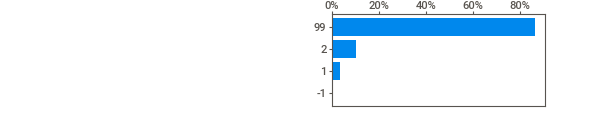
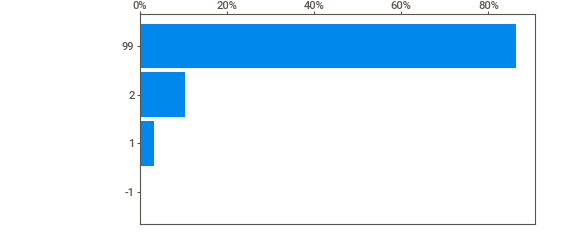
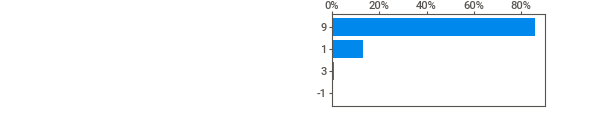
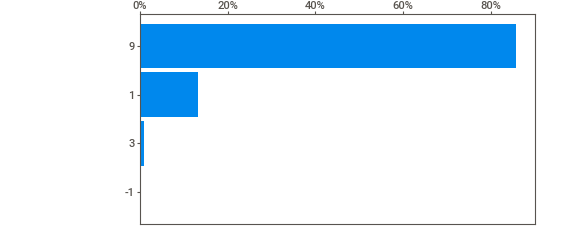
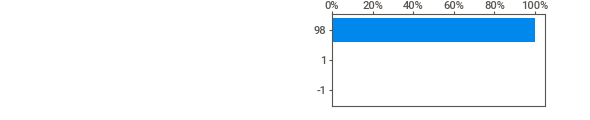
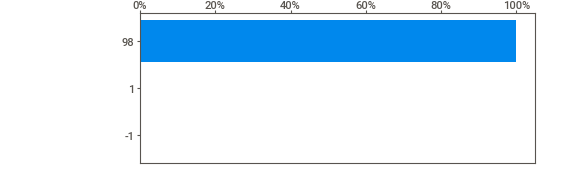
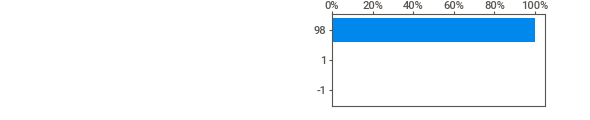
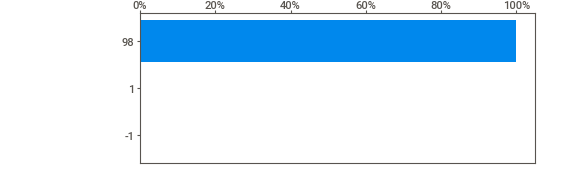
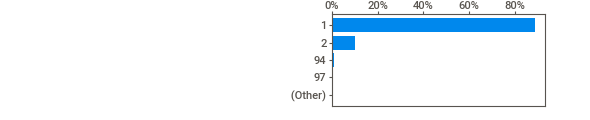
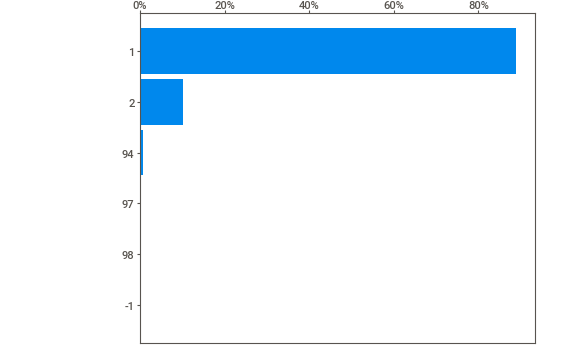
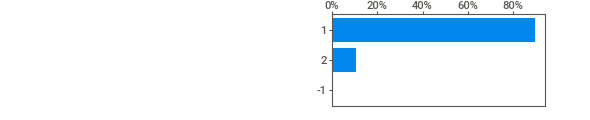
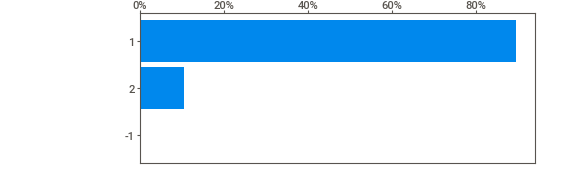
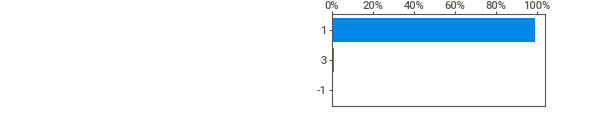
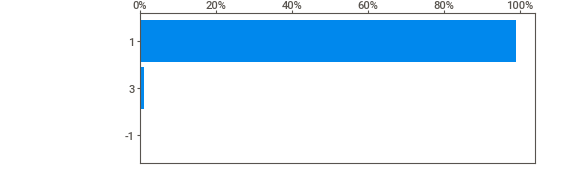
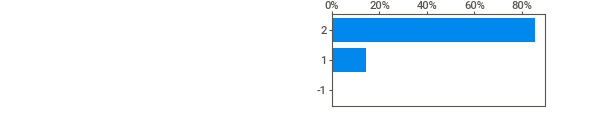
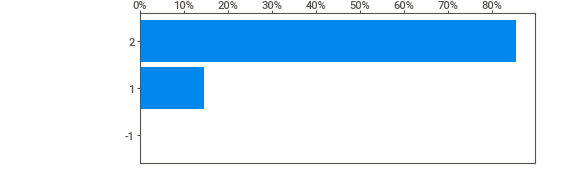
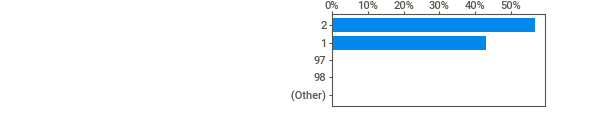
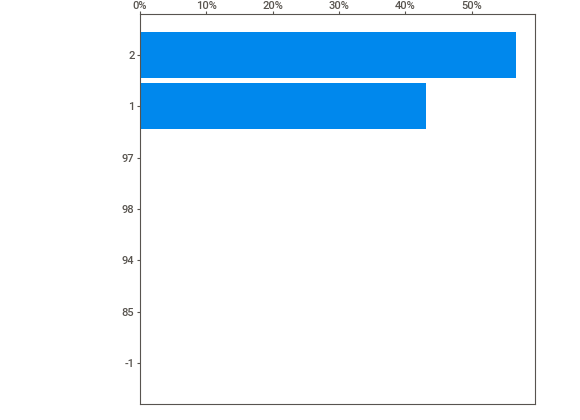
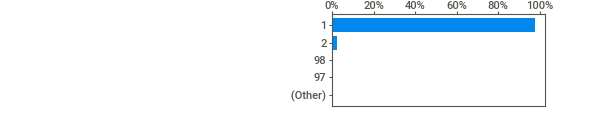
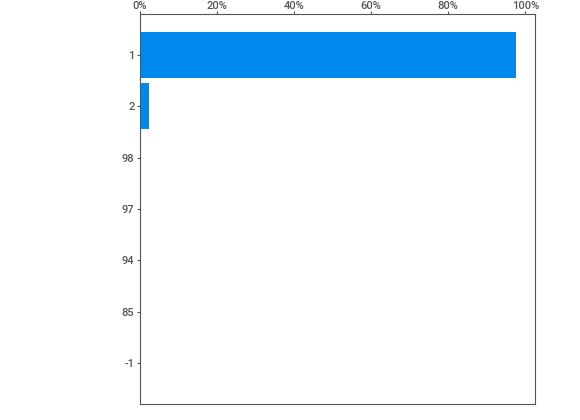
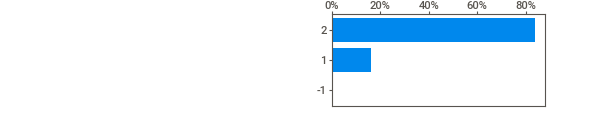
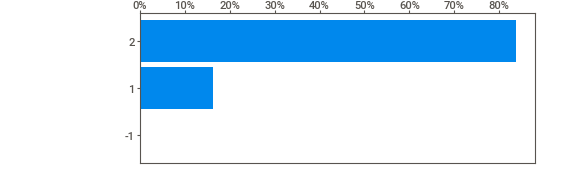
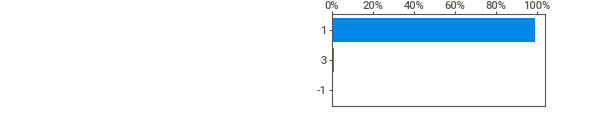
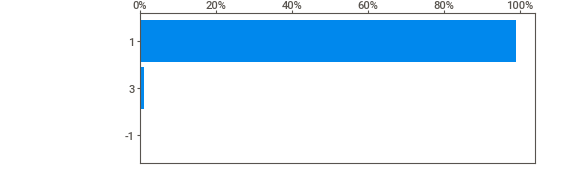
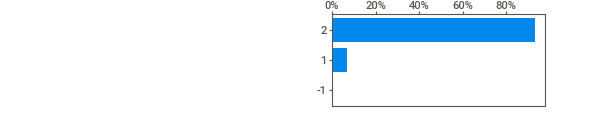
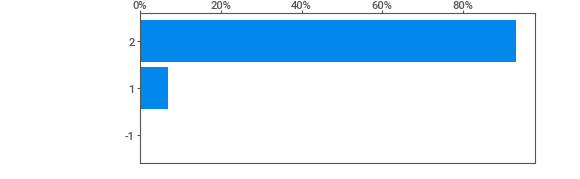
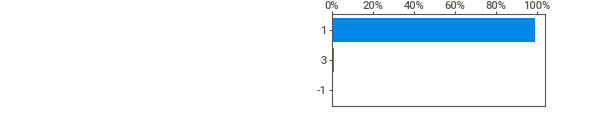
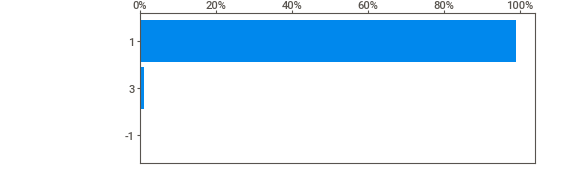
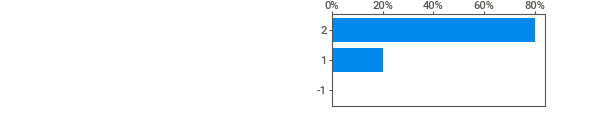
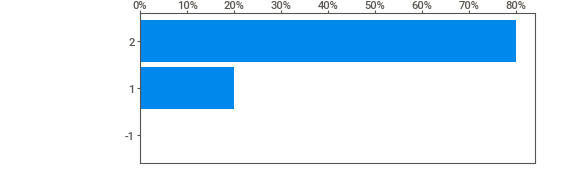
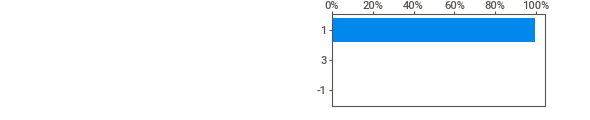
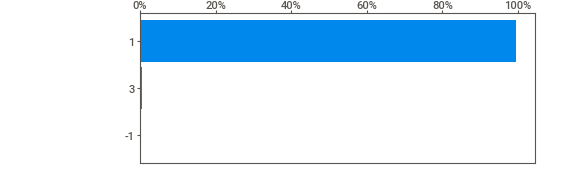
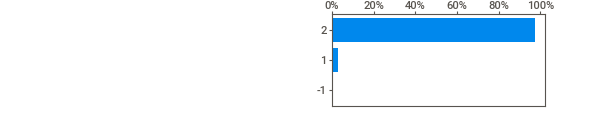
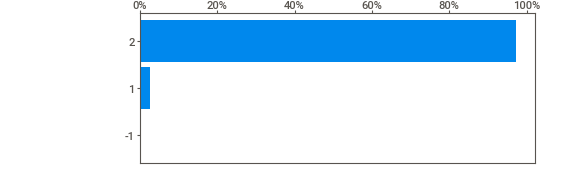
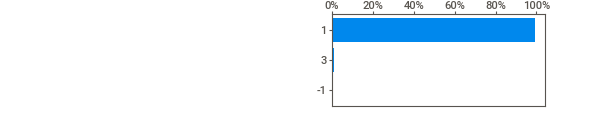
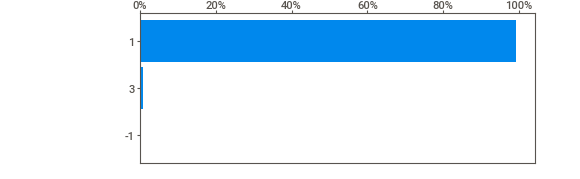
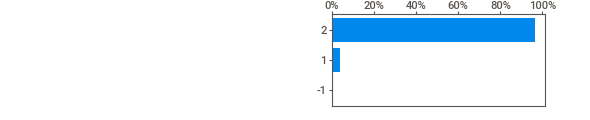
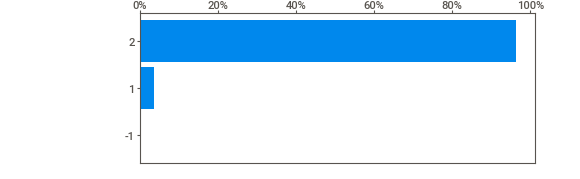
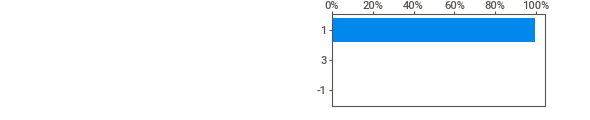
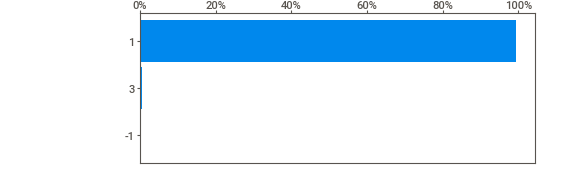
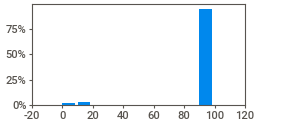
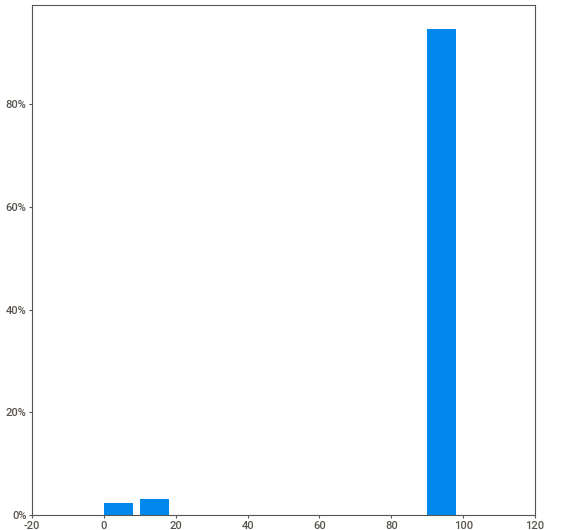
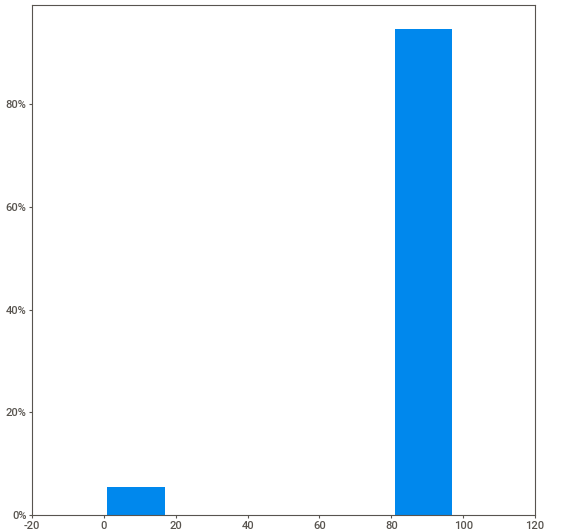
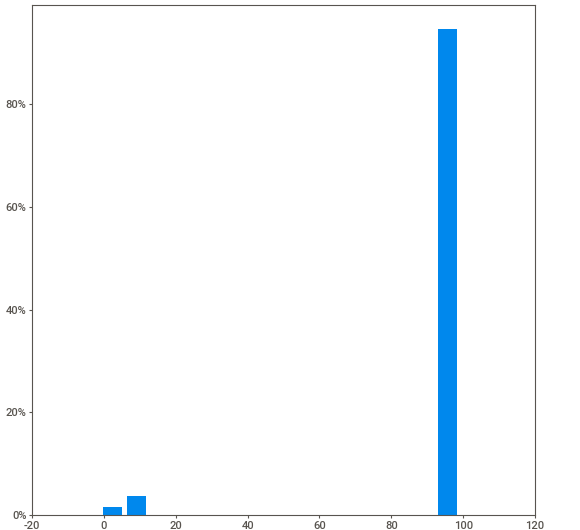
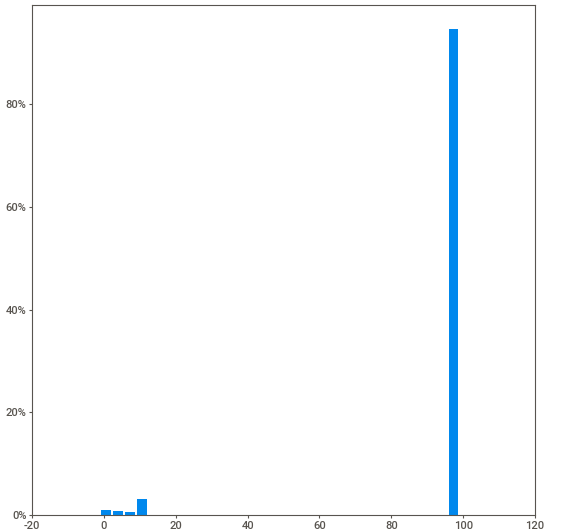
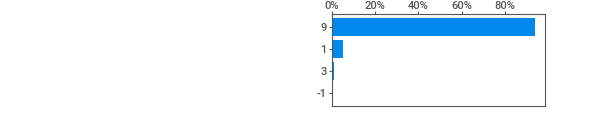
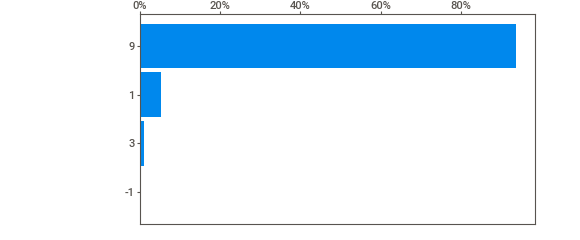
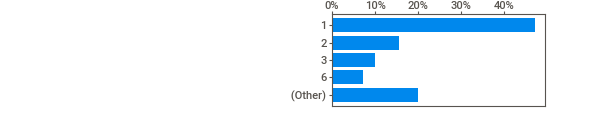
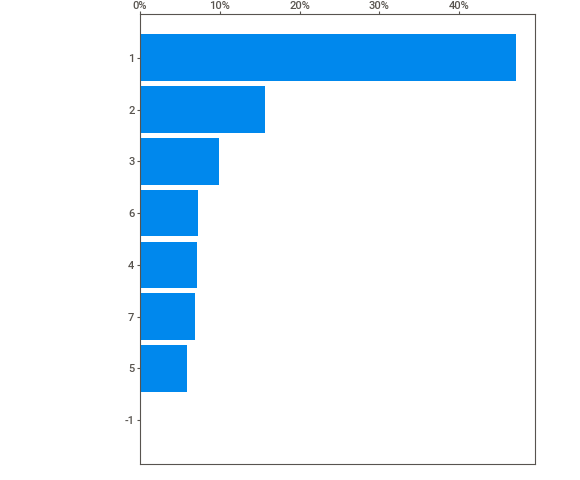
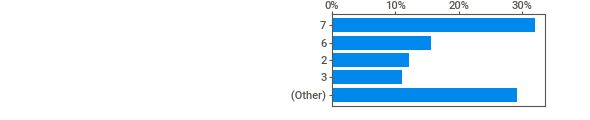
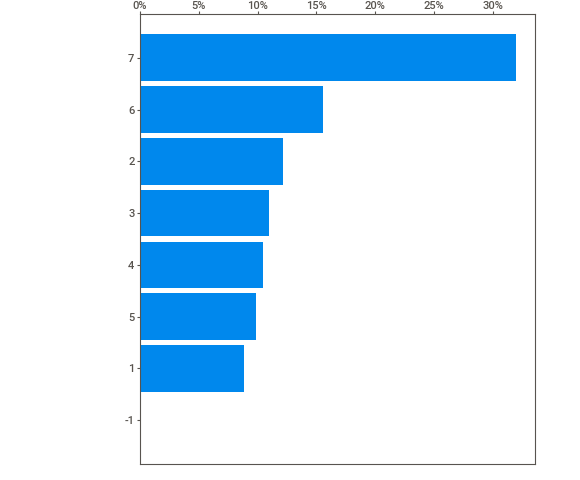
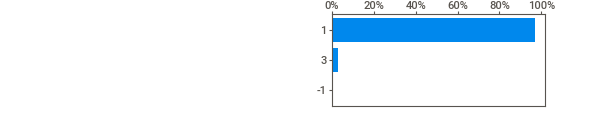
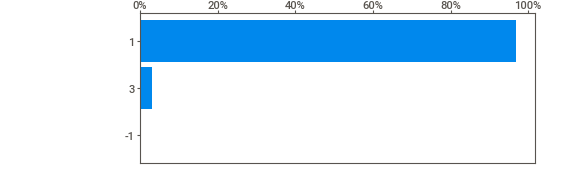
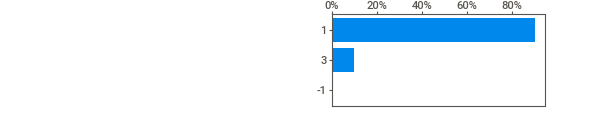
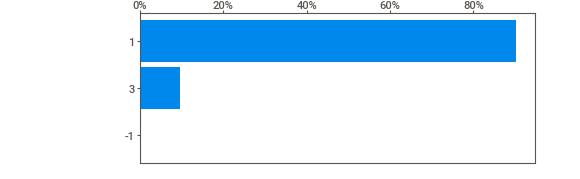
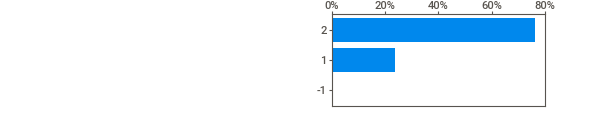
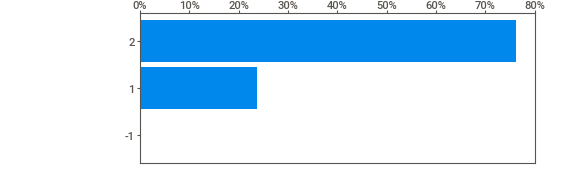
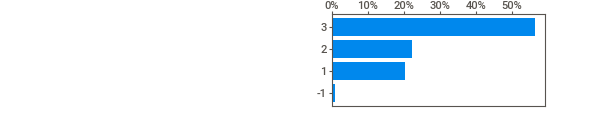
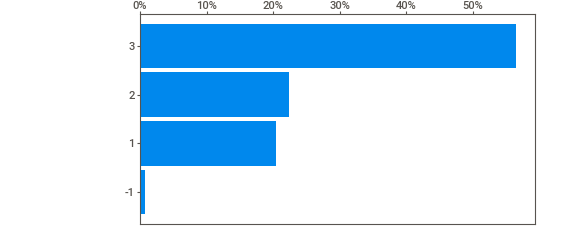
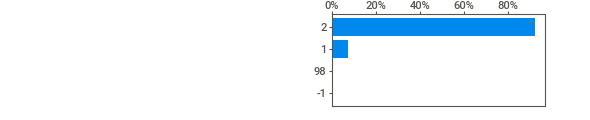
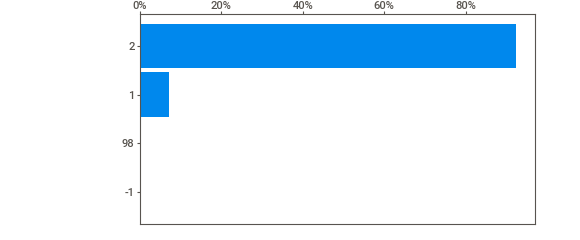
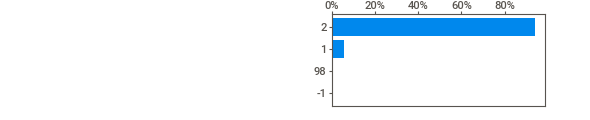
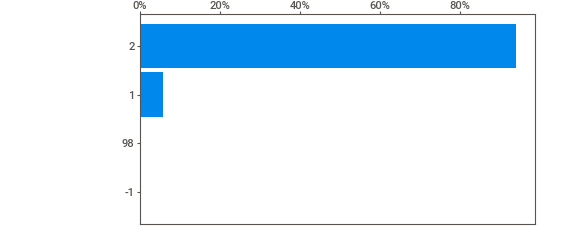
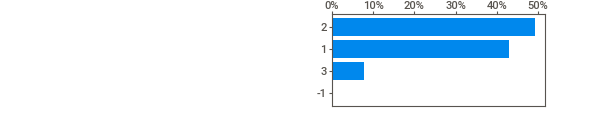
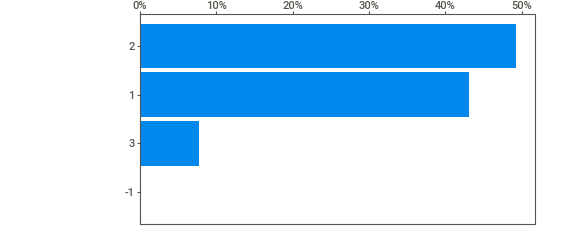
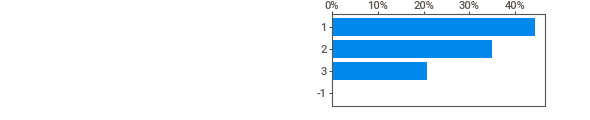
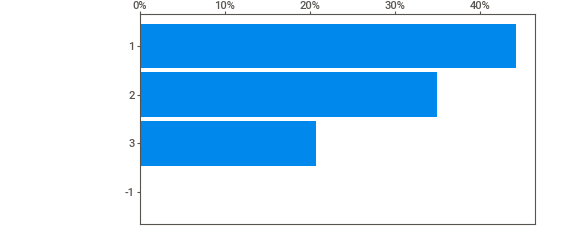
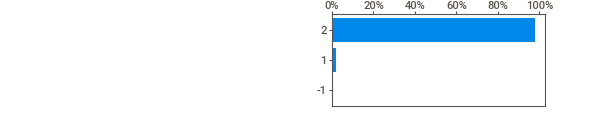
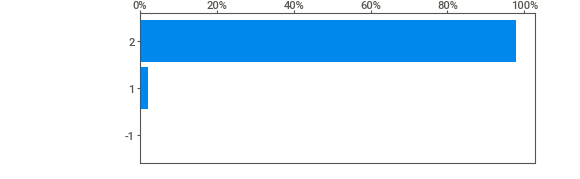
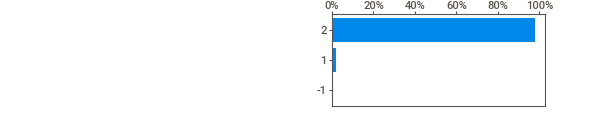
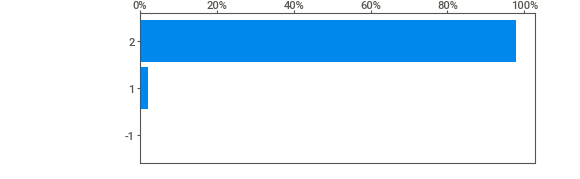
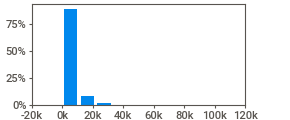
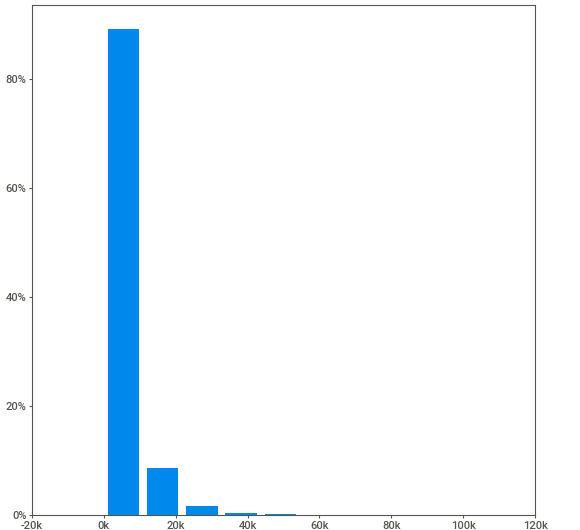
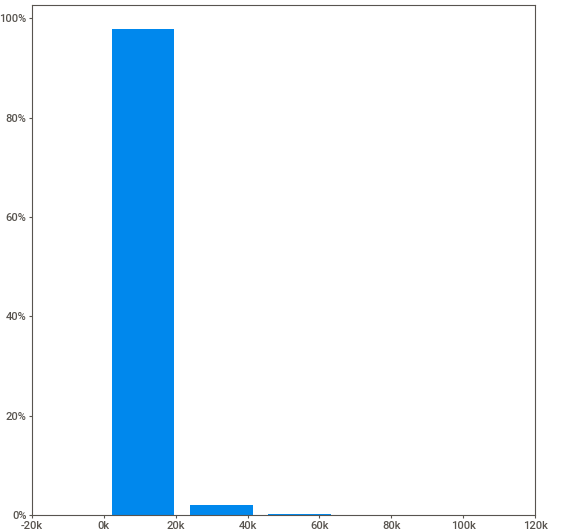
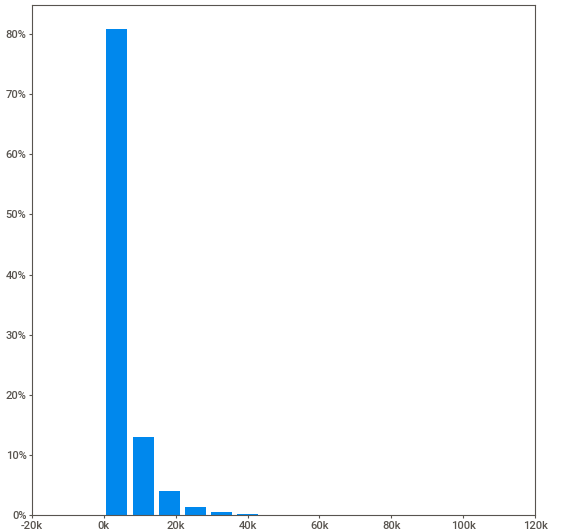
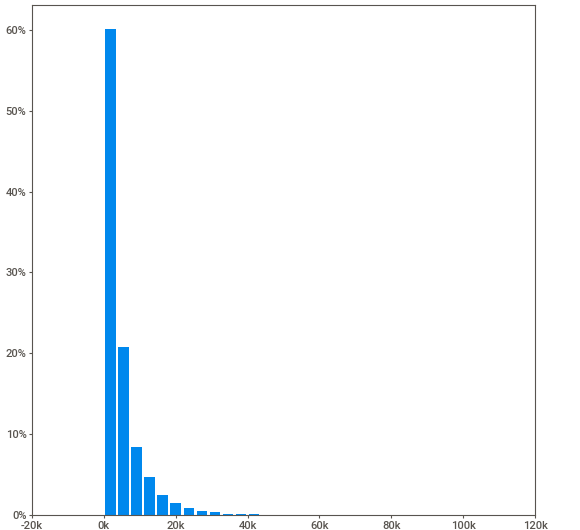
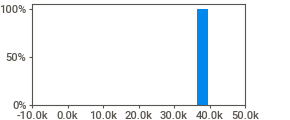
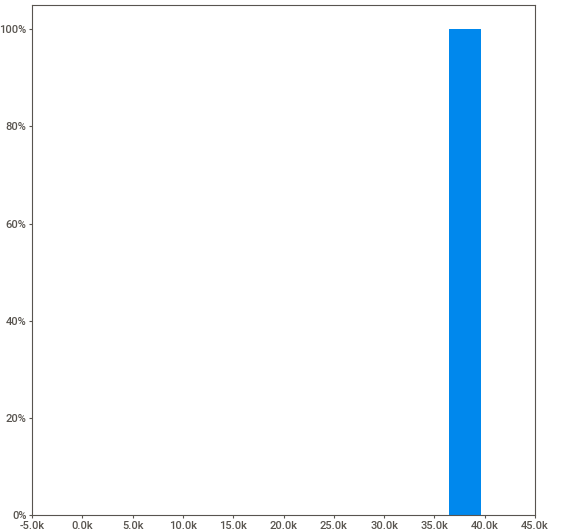
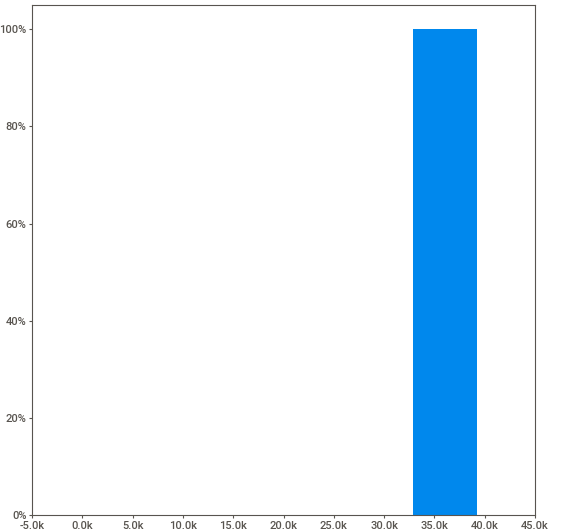
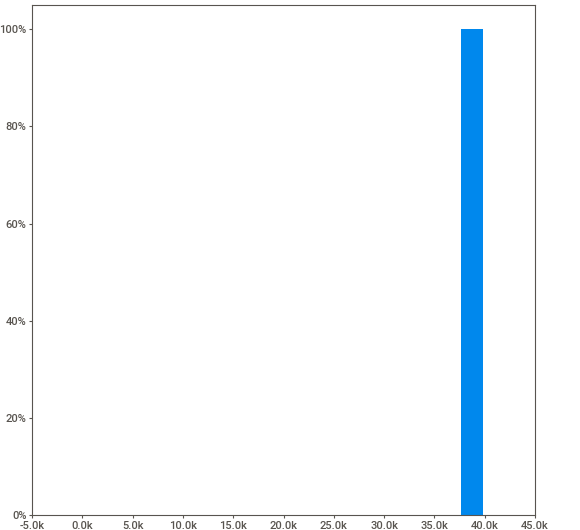
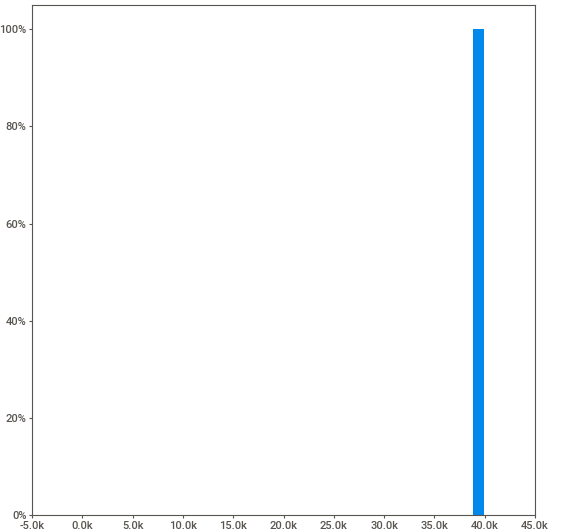
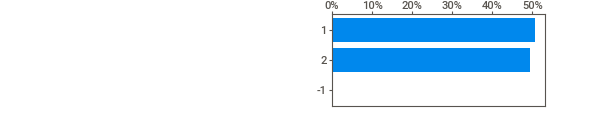
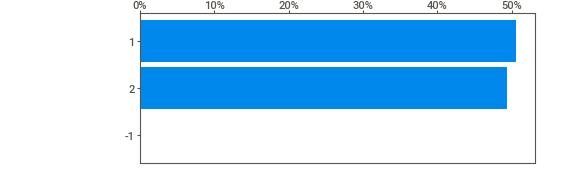
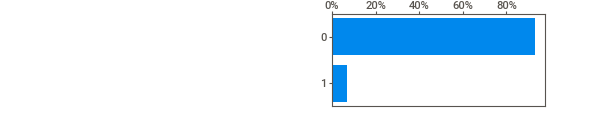
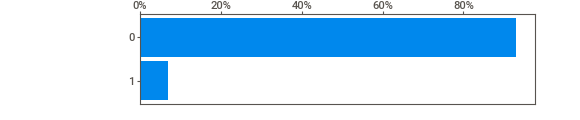
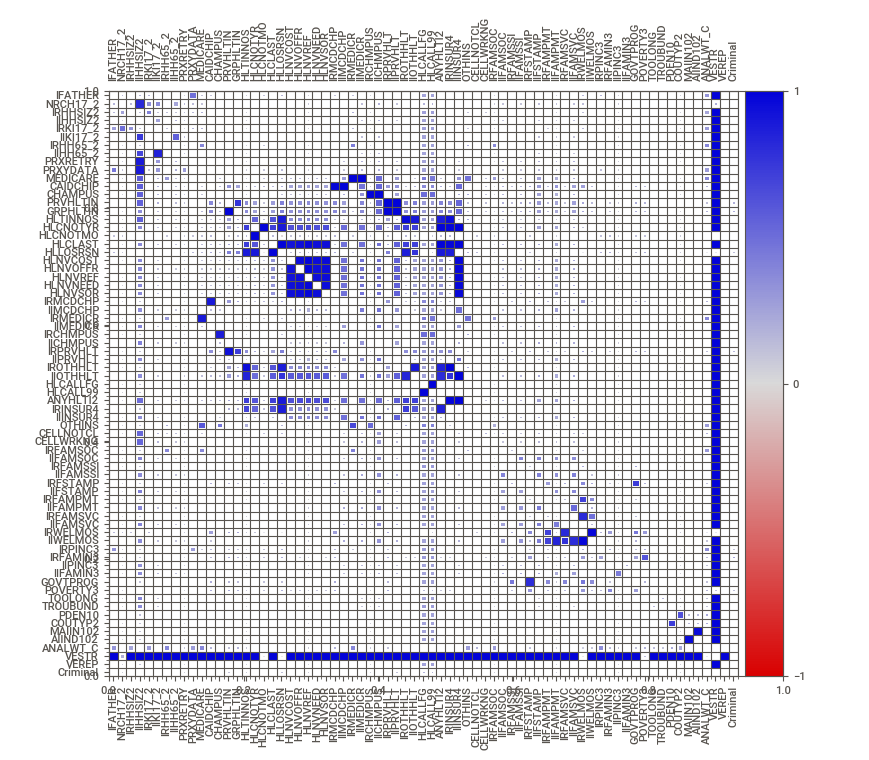
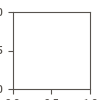

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
report = sweetviz.analyze(crime_train_df) # this method analayzes your whole dataset and draws charts for each column of your dataframe.

# To view the report inside a Jupyter Notebook, use this:
report.show_notebook() 

# To save the HTML format of the report, use this:
report.show_html()

In [33]:
scaler = MinMaxScaler()

x = crime_train_df.drop(['Criminal'], axis=1)
y = crime_train_df['Criminal']

x = scaler.fit_transform(x)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [10]:
X_train.shape

(41146, 70)

In [11]:
y_test.shape

(4572,)

In [12]:
labels = y.unique()
labels

array([0, 1], dtype=int64)

In [13]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None) # create lazy classifier object

In [14]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test) # this method trains all the ML Algorithms on your data
# and shows accuracy for each of them then you can compare different Algorithms' accuracies and choose the best ML Algorithm .

 97%|█████████▋| 28/29 [31:55<00:09,  9.88s/it]   

[LightGBM] [Info] Number of positive: 2859, number of negative: 38287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 41146, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069484 -> initscore=-2.594638
[LightGBM] [Info] Start training from score -2.594638


100%|██████████| 29/29 [31:55<00:00, 66.07s/it]


In [15]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.83,0.83,0.83,0.86,0.53
BernoulliNB,0.91,0.78,0.78,0.92,0.23
XGBClassifier,0.95,0.77,0.77,0.95,1.49
LGBMClassifier,0.95,0.77,0.77,0.95,0.84
RandomForestClassifier,0.95,0.76,0.76,0.95,6.32
AdaBoostClassifier,0.95,0.75,0.75,0.95,3.63
DecisionTreeClassifier,0.93,0.75,0.75,0.93,0.28
ExtraTreesClassifier,0.95,0.74,0.74,0.94,4.08
BaggingClassifier,0.95,0.74,0.74,0.94,1.63


In [16]:
deep_model = Sequential([
    
    Dense(50, activation="relu", input_dim=70),
    BatchNormalization(),
    Dense(60, activation="relu"),
    BatchNormalization(),
    Dense(70, activation="relu"),
    BatchNormalization(),
    
    Dropout(0.25),
    
    Dense(100, activation="relu"),
    BatchNormalization(),
    Dense(130, activation="relu"),
    BatchNormalization(),
    
    Dropout(0.25),
    
    Dense(80, activation="relu"),
    BatchNormalization(),
    Dense(67, activation="relu"),
    BatchNormalization(),
    
    Dropout(0.5),

    Dense(30, activation="relu"),
    Dense(1, activation="sigmoid")
    
])

deep_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

deep_model.load_weights("Criminality_Prediction_Model.h5")

In [17]:
deep_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60)             │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 70)             │         4,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 70)             │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         7,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 130)            │        13,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 130)            │           520 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 80)             │        10,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 67)             │         5,427 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 67)             │           268 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 67)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,316 (200.45 KB)

 Trainable params: 50,202 (196.10 KB)

 Non-trainable params: 1,114 (4.35 KB)

In [22]:
h = deep_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=55, batch_size=20)

Epoch 1/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9500 - loss: 0.1086 - val_accuracy: 0.9501 - val_loss: 0.1057
Epoch 2/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9541 - loss: 0.1039 - val_accuracy: 0.9497 - val_loss: 0.1056
Epoch 3/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9522 - loss: 0.1083 - val_accuracy: 0.9501 - val_loss: 0.1052
Epoch 4/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9523 - loss: 0.1045 - val_accuracy: 0.9506 - val_loss: 0.1071
Epoch 5/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9514 - loss: 0.1079 - val_accuracy: 0.9495 - val_loss: 0.1055
Epoch 6/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9538 - loss: 0.1045 - val_accuracy: 0.9497 - val_loss: 0.1060
Epoch 7/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9527 - loss: 0.1072 - val_accuracy: 0.9499 - val_loss: 0.1063
Epoch 8/55
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9511 - loss: 0.1082 - 

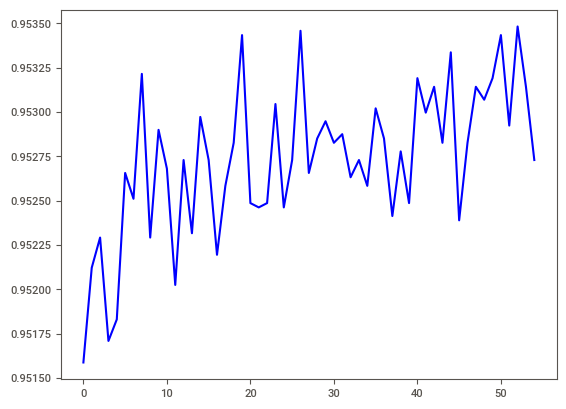

In [54]:
plt.plot(h.history['accuracy'], c="b")
plt.show()

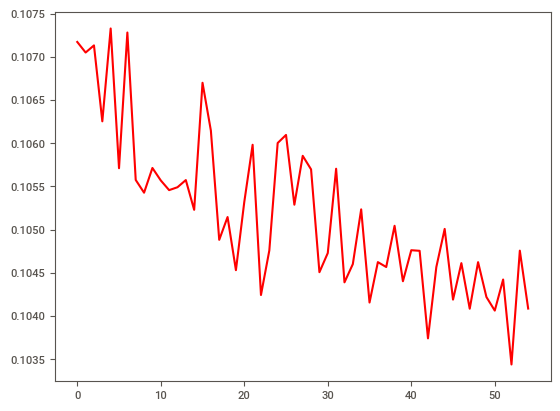

In [42]:
plt.plot(h.history['loss'], c="r")
plt.show()

In [43]:
deep_model.save("Criminality_Prediction_Model.h5")